<a href="https://colab.research.google.com/github/dudesparsh/Applied-ML/blob/master/Custom%20dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive
# Here \ used to complete for space that is coming between My and drive

/content/drive/My Drive


In [0]:
!git clone https://github.com/fastai/course-v3.git


Cloning into 'course-v3'...
remote: Enumerating objects: 5337, done.
remote: Total 5337 (delta 0), reused 0 (delta 0), pack-reused 5337
Receiving objects: 100% (5337/5337), 257.78 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (2887/2887), done.
Checking out files: 100% (857/857), done.


In [0]:
from fastai.vision import *


In [4]:
ls

'Colab Notebooks'/   data/   fastai/  'Getting started.pdf'


In [5]:
cd ..

/content/drive


In [0]:
cd fastai

/content/drive/My Drive/fastai


In [0]:
folder = 'data'

In [0]:
path = Path('/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [10]:
ls

'My Drive'/


In [11]:
path

PosixPath('/data/bears')

In [12]:
cd My\ Drive

/content/drive/My Drive


In [13]:
cd data/bears

/content/drive/My Drive/data/bears


In [0]:
folder = 'black'
file = '/content/drive/My Drive/data/bears/urls_black.csv'
dest ='/content/drive/My Drive/data/bears/black'

In [0]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'black'
file = '/content/drive/My Drive/data/bears/urls_teddys.csv'
dest ='/content/drive/My Drive/data/bears/teddys'
# folder = 'teddys'
# file = 'urls_teddys.csv'
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'grizzly'
file = '/content/drive/My Drive/data/bears/urls_grizzly.csv'
dest ='/content/drive/My Drive/data/bears/grizzly'

# file = 'urls_grizzly.csv'
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
path = "./"

In [16]:
# For removing images that can't be opened

for c in classes:
    print(c)
    verify_images(path, delete=True, max_size=500)

teddys
grizzly
black


In [17]:
path

'./'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [19]:
data.classes


['black', 'grizzly', 'teddys']

In [20]:
path

'./'

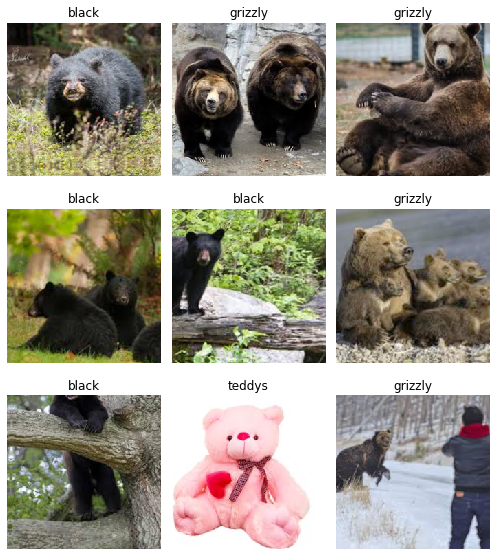

In [21]:
data.show_batch(rows=3, figsize=(7,8))


In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 256, 64)

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:06<00:00, 14.4MB/s]


In [24]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.764228,0.379035,0.078125,00:24
1,1.032598,0.417552,0.062500,00:04
2,0.704325,0.359941,0.046875,00:04
3,0.536423,0.306402,0.046875,00:04


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()


In [27]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [28]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.153280,0.321778,0.078125,00:04
1,0.112069,0.334804,0.062500,00:04


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');


In [31]:
interp = ClassificationInterpretation.from_learner(learn)


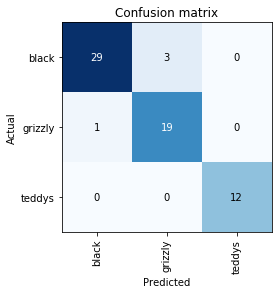

In [32]:
interp.plot_confusion_matrix()


In [0]:
# Cleaning
from fastai.widgets import *


In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');


In [36]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [37]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


In [0]:
learn.export()


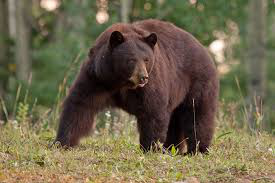

In [56]:
# from pathlib import Path

img = open_image('black/00000021.jpg', 'wb')
img

In [0]:
learn = load_learner(path)


In [58]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category black

In [0]:
# If learning rate is too high
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [60]:
learn.fit_one_cycle(1, max_lr=0.5)


epoch,train_loss,valid_loss,error_rate,time
0,16.748560,335128064.000000,0.687500,00:03


In [0]:
# If learning rate is too slow
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [62]:
learn.fit_one_cycle(5, max_lr=1e-5)


epoch,train_loss,valid_loss,error_rate,time
0,2.266652,1.930297,0.703125,00:04
1,2.220329,1.682499,0.718750,00:04
2,2.168181,1.582024,0.734375,00:04
3,2.212439,1.563639,0.718750,00:04
4,2.239946,1.554871,0.718750,00:04


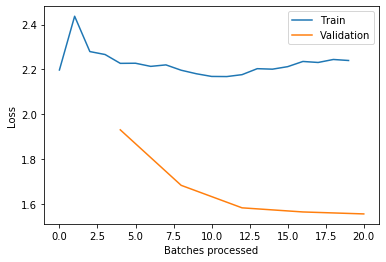

In [63]:
learn.recorder.plot_losses()


In [0]:
# If there are too few epochs
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)


In [66]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.154280,30.033855,0.812500,00:04


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)


In [69]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate, ps =0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:06<00:00, 15.7MB/s]


In [70]:
learn.fit_one_cycle(40, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.477226,1.960031,0.729167,00:04
1,1.493978,1.718594,0.701389,00:02
2,1.453558,1.523618,0.677083,00:02
3,1.392371,1.333254,0.611111,00:02
4,1.314960,1.182151,0.559028,00:02
5,1.241420,1.023974,0.479167,00:02
6,1.125980,0.886260,0.420139,00:02
7,1.010770,0.758744,0.347222,00:03
8,0.915476,0.646522,0.277778,00:02
9,0.828381,0.560104,0.232639,00:02
